

# Project: Investigate a TMDb movie dataset (21Nov17)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


Questions for research
- Per actor, what is the avg box office earning of films he has acted in. 
- per actor, what is the avg rating of movies he has acted in. 
- highest rated genres per yearbins, highest box office earning genres per year. 

In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import time

Try and suggest questions that promote looking at relationships between multiple variables. You should aim to analyze at least one dependent variable and three independent variables in your investigation. Make sure you use NumPy and Pandas where they are appropriate!

Dependent variable - yearbins a,b,c,d,e,f 1960 - 2015
Independent variables - rating of genres being studied

<a id='wrangling'></a>
## Wrangling

you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

tmdb_df = pd.read_csv('tmdb-movies.csv')
len(tmdb_df)
tmdb_df.iloc[:1, 10:]
#cast, director, production companies, keywords, genres
#

,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


<h3>PROBLEM 1</h3>

In [5]:
#tmdb_df.duplicated('id')
df = tmdb_df
df[df.duplicated(['id'], keep=False)]  #row 2089 and 2090 have same content . id = 42194

#delete 2090
df.drop(2090, inplace=True) #row has been deleted.
len(df)  #new length - 10865

10865

<h3>PROBLEM 2</h3>
We see that its string type. We need to convert it to python date type. 

Checking what is the type stored in 'release_date' column

In [6]:
type(df['release_date'][2])

str

<h3>PROBLEM 3</h3>
We see that the 'cast' column has string data separated by '|'. We would want them to be in list form. We can use .split() for this. 
Same for 'genres', 'production_companies' and 'keywords'

In [7]:
print(df['cast'][4])

Vin Diesel|Paul Walker|Jason Statham|Michelle Rodriguez|Dwayne Johnson



<h3>PROBLEM 4<h3>


In [8]:
tmdb_df.iloc[0:2, 14:].head()

,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

Problem 2 - fixing
changing str to date type


In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [10]:


def parsedate(string):
    return time.strptime(string, '%x')

parsedate('10/02/92')

df['release_date'] = df['release_date'].apply(parsedate)

PROBLEM -3 fixing
Making | separated string values, into a list of strings

In [11]:
def isnan(f):
    return isinstance(f, float) and f!=f


a: 1960 - 1969
b: 1970 - 1979
c: 1980 - 1989
d: 1990 - 1999
e: 2000 - 2009
f: 2010 - 2019

In [12]:
#check if release_year has nans
assert len(df[df.release_year.apply(isnan)]) == 0 # returned 0rows x 24 columns --> no nan values

#new column - year_bin a,b,c,d,e,f 
def yearbins(year):
    
    if 1960 <= year <= 1969:
        return 'a'
    if 1970 <= year <= 1979:
        return 'b'
    if 1980 <= year <= 1989:
        return 'c'
    if 1990 <= year <= 1999:
        return 'd'
    if 2000 <= year <= 2009:
        return 'e'
    if 2010 <= year <= 2019:
        return 'f'

df['year_bin']=df.release_year.apply(yearbins)

In [16]:
#cast, director, keywords, genres, production companies --> make into set
    

def splitstringtoset(string):
    newset = set()
    if isnan(string):
            return string
    
    else:
        for q in [x.strip() for x in string.split('|')]:
            newset.add(q)
    return newset

df.cast=df.cast.apply(splitstringtoset)
df.director=df.director.apply(splitstringtoset)
df.keywords = df.keywords.apply(splitstringtoset)
df.genres = df.genres.apply(splitstringtoset)
df.production_companies = df.production_companies.apply(splitstringtoset)



#cast, director, keywords, genres, production companies 


<a id='eda'></a>
## Exploration

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Q1
### Which genres are most popular from year to year? 
highest rated genres per year, highest box office earning genres per year.

Algo:
for each yearbin of 10 years
take all genres appearing in all movies in that yearbin. 
for each genre, find the avg rating and avg. (revenue_adj - budget_adj), of all the movies that contain that genre tag. 


In [ ]:
df.cast.iloc[0]

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#Algo:
#for each year bin
#for each genre, find the avg rating and avg. (revenue_adj - budget_adj), of all the movies that contain that genre tag. 

#allgenres_yearbin = {} #all genres seen in a yearbin. key value pairs(deprecated) --> same as allgenres

In [18]:
# populate allgenres --> set
def splitcsv(list):

    if(isnan(list)):
        pass

    else:
        for x in list:
            allgenres.add(x)


allgenres=set() #all genres of movives
df.genres.apply(splitcsv) #populating all genres
len(allgenres)

# populate allgenres --> set



20

In [19]:
index = list(allgenres)
columns = ['a','b','c','d','e','f']
#genre yearbin rating
gyr_df = pd.DataFrame(index = index, columns=columns)
numberofoccurences_genre = pd.DataFrame(index = index, columns = columns)



In [20]:
#for gyr_df --> the ratings for genres in each yearbins
#for numberofoccurences_genre -->  numbers of occureces of a genres in each yaerbin
# we are filling values 
gb_yearbin= df.groupby('year_bin')
for yearbin, yearbin_df in gb_yearbin:
    
    for i in list(allgenres): #for each genre we are analysing
        
        def ifinset(sett):
            if(isnan(sett)):
                #print(sett)
                return False
            for eachgenre in sett:
                if eachgenre == i:
                    return True
            return False
        

        #filling gyr_df
        gyr_df.loc[i,yearbin] = np.nanmean(yearbin_df[yearbin_df.genres.apply(ifinset)]['vote_average']) 
        
        #filling no. of occurences
        numberofoccurences_genre.loc[i,yearbin] = len(yearbin_df[yearbin_df.genres.apply(ifinset)])

In [21]:
#Taking most popular 5 genres across bins, and adding it into a set, so that we can use that set for our analysis

genresbeingstudied = set()

for bins in ['a','b','c','d','e','f']:
    for genre in pd.to_numeric(numberofoccurences_genre[bins]).nlargest(5).index.values:
        genresbeingstudied.add(genre)


genresbeingstudied # --> we get 7 genres in total which we will study in this analysis
    
#Taking least popular 3 genres across bins, and addint it into a set, just to see. 
leastpopulargenres = set()

for bins in ['a','b','c','d','e','f']:
    for genre in pd.to_numeric(numberofoccurences_genre[bins]).nsmallest(3).index.values:
        leastpopulargenres.add(genre)
leastpopulargenres

{'Documentary', 'Foreign', 'TV Movie', 'War', 'Western'}

In [22]:
#find average rating of the genresbeingstudied from 1960 - 2020

avg_rating_of_genresbeingstudied_dict = {}

for i in list(genresbeingstudied):
    #print i
    
    def ifinset(sett):
            if(isnan(sett)):
                #print(sett)
                return False
            for eachgenre in sett:
                if eachgenre == i:
                    return True
            return False
    
    avg_rating_of_genresbeingstudied_dict[i]=(np.nanmean(df[df.genres.apply(ifinset)]['vote_average']))
    


#putting into Series

avg_rating_of_genresbeingstudied_series = pd.Series(avg_rating_of_genresbeingstudied_dict.values(), index = avg_rating_of_genresbeingstudied_dict.keys())
#avg_rating_of_genresbeingstudied_series

,a,b,c,d,e,f
Action,0.254556,0.583323,0.144234,-0.0110484,-0.0431363,-0.134212
Adventure,0.309415,0.380195,0.107415,-0.124221,-0.110743,0.0596827
Comedy,0.248815,0.506308,0.116562,0.00785837,-0.126068,0.0241877
Drama,0.205287,0.347006,0.0914278,0.0562635,-0.0411499,-0.0950713
Horror,0.730639,0.752938,0.427259,0.132395,-0.0795953,-0.326974
Romance,0.133246,0.337518,0.0296976,0.0301467,-0.101484,0.050834
Thriller,0.577454,0.597302,0.244714,0.145289,-0.0309785,-0.239065


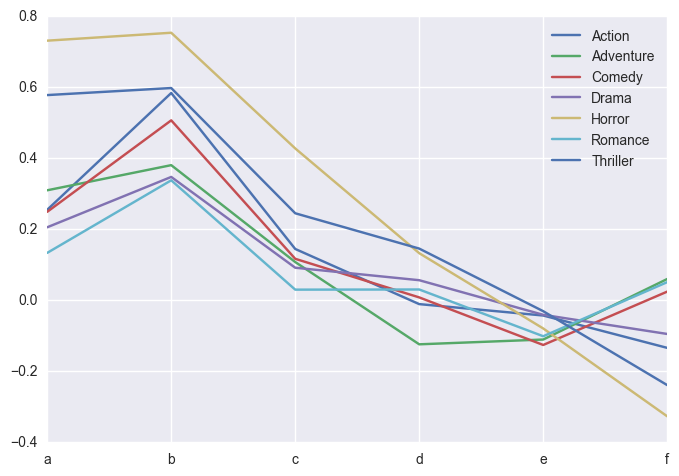

In [23]:

gyr_df.loc[list(genresbeingstudied)].sub(avg_rating_of_genresbeingstudied_series, axis =0).transpose().plot()

gyr_df.loc[list(genresbeingstudied)].sub(avg_rating_of_genresbeingstudied_series, axis =0)


#This is after the avg rating of each genres has been normallized with all ratings of that genre across all years

,a,b,c,d,e,f
Romance,6.17612,6.38039,6.07257,6.07302,5.94139,6.09371
Horror,6.06809,6.09038,5.76471,5.46984,5.25785,5.01047
Drama,6.37083,6.51255,6.25697,6.22181,6.1244,6.07047
Adventure,6.25,6.32078,6.048,5.81636,5.82984,6.00027
Action,6.04231,6.37107,5.93199,5.7767,5.74462,5.65354
Comedy,6.15398,6.41148,6.02173,5.91303,5.7791,5.92936
Thriller,6.32812,6.34797,5.99538,5.89596,5.71969,5.51161


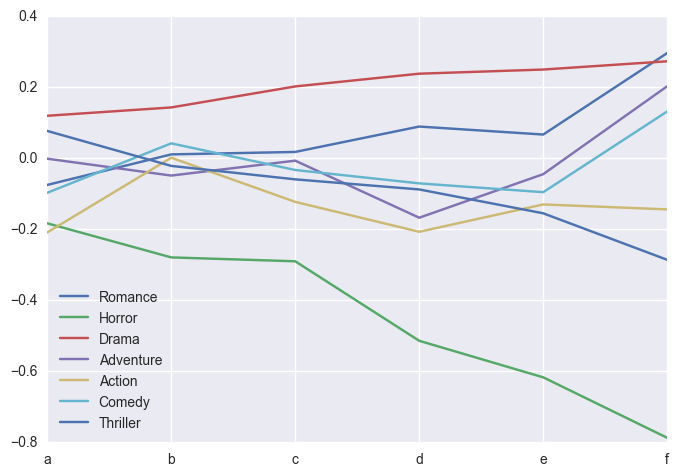

In [28]:
#Normalize with avg rating of movies from the (genres being studied) in each yearbin -->
index = list(genresbeingstudied)
columns = ['a','b','c','d','e','f']
#genre yearbin rating
avg_rating_of_allgenresbeingstudied_in_eachyearbin = pd.Series(index=columns)


for yearbin, yearbin_df in gb_yearbin:
    
    #for i in list(allgenres): #for each genre we are analysing
    def ifbeingstudied(set):
        if(isnan(set)):
            #print(set)
            return False
        for eachgenre in set:
            if eachgenre in genresbeingstudied:
                return True
        return False
        
    avg_rating_of_allgenresbeingstudied_in_eachyearbin[yearbin] =\
    np.nanmean(yearbin_df[yearbin_df.genres.apply(ifbeingstudied)]['vote_average'])



(gyr_df.loc[list(genresbeingstudied)] - avg_rating_of_allgenresbeingstudied_in_eachyearbin).transpose().plot()
(gyr_df.loc[list(genresbeingstudied)] - avg_rating_of_allgenresbeingstudied_in_eachyearbin)
#avg_rating_of_allgenresbeingstudied_in_eachyearbin
gyr_df.loc[list(genresbeingstudied)]

### q2 - steamy 

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!